<a href="https://colab.research.google.com/github/robin-wang/Tensorflow-MNIST-Setup/blob/master/TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TENSORFLOW - MNIST KERAS**

Robin Wang April 2019

https://www.tensorflow.org/tutorials/keras/basic_classification

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

TensorFlow Module

In [0]:
#https://www.tensorflow.org/tutorials/keras/basic_classification
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

# Numpy and Matplotlib for Visualisation
import numpy as np
import matplotlib.pyplot as plt

# Confirm TensorFlow Version
print(tf.__version__)

1.13.1


In [0]:
#Keras
#https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# batch-size
batch_size = 128
# numbers 10 digits
num_classes = 10
# iterations
epochs = 12

# image dimension
img_rows,img_cols = 28,28

Using TensorFlow backend.


Data Input

In [0]:
# Previous code: mnist_data = tf.keras.datasets.mnist
# (train_images, train_values),(test_images, test_values) = mnist_data.load_data()

(train_images, train_values),(test_images, test_values) = mnist.load_data()
#Images are 28X28 NumPy arrays, pixel values ranging between 0 and 255
#Values are uint8 type from 0 to 9
train_images.shape


11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)

In [0]:
train_values

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

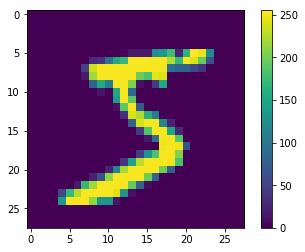

In [0]:
#Examine training images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preparation and Scaling

In [0]:
if K.image_data_format() == 'channels_first':
  train_images = train_images.reshape(train_images.shape[0],1,img_rows,img_cols)
  test_images = test_images.reshape(test_images.shape[0],1,img_rows,img_cols)
  input_shape = (1,img_rows,img_cols)
else:
  train_images = train_images.reshape(train_images.shape[0],img_rows,img_cols,1)
  test_images = test_images.reshape(test_images.shape[0],img_rows,img_cols,1)
  input_shape = (img_rows,img_cols,1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255
print('train_images shape -',train_images.shape)
print(train_images.shape[0],'training samples')
print(test_images.shape[0],'testing samples')

# Class conversion into binary class matrices
train_values = keras.utils.to_categorical(train_values,num_classes)
test_values = keras.utils.to_categorical(test_values,num_classes)

train_images shape - (60000, 28, 28, 1)
60000 training samples
10000 testing samples


In [0]:
# Use Sequential to add layers
model = Sequential()
  # Convolutional Layers, arguments - https://keras.io/layers/convolutional/
model.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
    # Kernel_size - height and width of 2D convolution window
    # Activation - Function
    # Input Shape - after setting data format as 'channels_first'
model.add(Conv2D(64,(3,3), activation="relu"))
  # MaxPooling https://keras.io/layers/pooling/
    # factors by which to downscale (vertical, horizontal). 
    # (2, 2) will halve the input in both spatial dimension
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
  # Densely related NN network
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
  # Loss Function, Optimisers, Metrics to be evaluated
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(train_images,train_values,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images,test_values))
score = model.evaluate(test_images,test_values,verbose=0)
print('Test Loss - ',score[0])
print('Test Accuracy - ',score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 171s 3ms/step - loss: 0.2764 - acc: 0.9150 - val_loss: 0.0596 - val_acc: 0.9802
Epoch 2/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0894 - acc: 0.9730 - val_loss: 0.0435 - val_acc: 0.9852
Epoch 3/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0659 - acc: 0.9800 - val_loss: 0.0361 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0555 - acc: 0.9836 - val_loss: 0.0323 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0463 - acc: 0.9860 - val_loss: 0.0306 - val_acc: 0.9893
Epoch 6/12
60000/60000 [=

The following are codes used previously...

Flatten layer has no parameters to learn, only reformatting
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu), 
    #layer has 512 nodes/neurons
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
    #10-node softmax layer, returning an array of 10 probability scores thtat sum to 1
])

In [0]:
model.evaluate(test_images, test_values)


10000/10000 [==============================] - 8s 813us/step


[0.02631362307975196, 0.9911]

Model predictions

In [0]:
predictions = model.predict(test_images)
predictions[0] #10 number array

array([2.1564459e-11, 2.5381132e-12, 5.8968741e-10, 1.0997460e-08,
       2.3790828e-14, 2.9636332e-12, 1.8389019e-16, 1.0000000e+00,
       3.0374356e-11, 6.7975376e-09], dtype=float32)

In [0]:
np.argmax(predictions[0])

7

In [0]:
test_values[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)